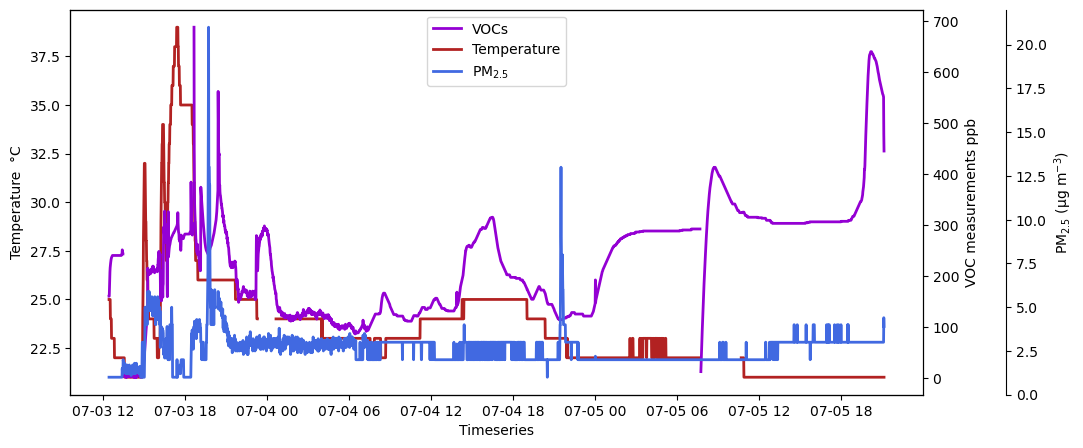

In [33]:
# import modules
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt



# read data
data_in = pd.read_csv('F06B3188CF17-05-Jul-2023-21-10-00.csv', header = None, 
                      skiprows = 1, delimiter = ',').values

# extract variables
date = data_in[:,0]
vocs = data_in[:,1]
temp = data_in[:,3]
pm2_5 = data_in[:,7]

#convert ppm vocs to ppb 
ppb = vocs * 1000

# mask unreasonable values
ppb = np.ma.masked_where(np.logical_or(ppb > 1000., ppb <= 0.), ppb)


# loop through all our dates, convert them to datetime objects
for i in range(0, len(date)):
    
    date[i] = datetime.strptime(date[i], '%Y-%m-%d %H:%M:%S')


#fig = plt.figure(figsize = (10,5))
#fig = plt.figure()
#ax = fig.add_subplot(1,1)
fig1, ax1 = plt.subplots(1,1)
ax2 = ax1.twinx()
ax3 = ax1.twinx()
fig1.set_size_inches(11,5)
#plt.legend()
ax1.set_xlabel('Timeseries')
lns1 = ax2.plot(date, ppb, color = 'darkviolet', lw = 2, label = 'VOCs')
lns2 = ax1.plot(date, temp, color = 'firebrick', lw = 2, label = 'Temperature')
lns3 = ax3.plot(date, pm2_5, color = 'royalblue', lw = 2, label = 'PM$_{2.5}$')

ax3.spines['right'].set_position(('outward', 60))

# added these three lines
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper center')

ax2.set_ylabel('VOC measurements ppb')
ax1.set_ylabel('Temperature  \N{DEGREE SIGN}C')
ax3.set_ylabel('PM$_{2.5}$ (\u03BCg m$^{-3}$)')
plt.savefig('voc.png', dpi = 200)
plt.show()



In [ ]:
lns3 = ax3.plot(date,pm2_5, color = 'blue', lw = 2, label = 'PM 2.5')
